In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("../data/PM_ML_Data_Final.xlsx")

In [3]:
df

,TestID,WNRD,WNVol,WNNCD,Class
0,1,0.000120,0.012339,0.008525,Similar
1,2,0.000120,0.011953,0.008375,Similar
2,3,0.000196,0.007618,0.004438,Similar
3,4,0.000197,0.007452,0.004424,Similar
4,5,0.000162,0.012785,0.009120,Similar
...,...,...,...,...,...
961,962,0.091940,0.124211,0.153080,Different
962,963,0.082274,0.117211,0.140817,Different
963,964,0.091940,0.124431,0.153347,Different
964,965,0.082279,0.111474,0.135962,Different


In [4]:
df = pd.read_excel("../data/PM_ML_Data_Final.xlsx", index_col="TestID")

In [5]:
df

,WNRD,WNVol,WNNCD,Class
TestID,,,,
1,0.000120,0.012339,0.008525,Similar
2,0.000120,0.011953,0.008375,Similar
3,0.000196,0.007618,0.004438,Similar
4,0.000197,0.007452,0.004424,Similar
5,0.000162,0.012785,0.009120,Similar
...,...,...,...,...
962,0.091940,0.124211,0.153080,Different
963,0.082274,0.117211,0.140817,Different
964,0.091940,0.124431,0.153347,Different


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
seed = 7

In [8]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [9]:
X

,WNRD,WNVol,WNNCD
TestID,,,
1,0.000120,0.012339,0.008525
2,0.000120,0.011953,0.008375
3,0.000196,0.007618,0.004438
4,0.000197,0.007452,0.004424
5,0.000162,0.012785,0.009120
...,...,...,...
962,0.091940,0.124211,0.153080
963,0.082274,0.117211,0.140817
964,0.091940,0.124431,0.153347


In [10]:
y

TestID
1        Similar
2        Similar
3        Similar
4        Similar
5        Similar
         ...    
962    Different
963    Different
964    Different
965    Different
966    Different
Name: Class, Length: 966, dtype: object

In [11]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [12]:
X_train

,WNRD,WNVol,WNNCD
TestID,,,
415,0.002227,0.105717,0.062179
319,0.198656,0.127894,0.233370
573,0.002356,0.169175,0.120250
506,0.008541,0.089513,0.060240
601,0.000945,0.168636,0.136925
...,...,...,...
580,0.002454,0.114904,0.083363
503,0.007232,0.093650,0.066664
538,0.000882,0.123532,0.086431


In [13]:
X_test

,WNRD,WNVol,WNNCD
TestID,,,
238,0.186641,0.127044,0.224919
564,0.006220,0.098347,0.082061
676,0.006239,0.134682,0.100609
25,0.000435,0.008095,0.005574
205,0.160748,0.140607,0.210533
...,...,...,...
796,0.000386,0.022569,0.016738
189,0.167908,0.161788,0.215418
252,0.185649,0.130624,0.223735


In [14]:
y_train

TestID
415           Lab
319     Different
573    Instrument
506    Instrument
601    Instrument
          ...    
580    Instrument
503    Instrument
538    Instrument
197     Different
176     Different
Name: Class, Length: 676, dtype: object

In [15]:
y_test

TestID
238     Different
564    Instrument
676    Instrument
25        Similar
205     Different
          ...    
796           Day
189     Different
252     Different
72        Similar
682    Instrument
Name: Class, Length: 290, dtype: object

# 결정트리 알고리즘

## 학습 -> 모델

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 모델 평가

In [19]:
evaluations = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test, evaluations))

              precision    recall  f1-score   support

         Day       0.70      0.80      0.75        35
   Different       1.00      1.00      1.00        80
  Instrument       1.00      0.99      0.99        92
         Lab       1.00      1.00      1.00        13
     Similar       0.88      0.83      0.85        70

    accuracy                           0.93       290
   macro avg       0.92      0.92      0.92       290
weighted avg       0.93      0.93      0.93       290



In [24]:
print(confusion_matrix(y_test, evaluations))

[[28  0  0  0  7]
 [ 0 80  0  0  0]
 [ 0  0 91  0  1]
 [ 0  0  0 13  0]
 [12  0  0  0 58]]


In [31]:
print("훈련정확도:{: .3f}".format(model.score(X_train, y_train)))

훈련정확도: 1.000


In [32]:
print("예측정확도:{: .3f}".format(model.score(X_test, y_test)))

예측정확도: 0.931


In [40]:
print("속성중요도: ",format(model.feature_importances_))

속성중요도:  [0.46958664 0.06501135 0.46540201]


해석: 3가지 속성 중 WNRD, WNNCD 는 중요하나, WNvol 은 그다지 중요한 요소가 아님

## 결정트리 그리기

In [41]:
from sklearn.tree import export_graphviz

In [44]:
import graphviz

In [49]:
features = ['WNRD', 'WNVol', 'WNNCD']

In [58]:
export_graphviz(model,
               feature_names=features,
               class_names=['Similar', 'Different', 'Lab', 'Instrument', 'Day'],
               out_file="decision-tree.dot",
               filled=True)

In [59]:
with open("decision-tree.dot") as f:
    dot_graph = f.read()

In [60]:
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [61]:
X_train.to_csv("../data/PM_Tree_train.csv")

In [64]:
X_train_saved = pd.read_csv("../data/PM_Tree_train.csv", index_col="TestID")
X_train_saved

,WNRD,WNVol,WNNCD
TestID,,,
415,0.002227,0.105717,0.062179
319,0.198656,0.127894,0.233370
573,0.002356,0.169175,0.120250
506,0.008541,0.089513,0.060240
601,0.000945,0.168636,0.136925
...,...,...,...
580,0.002454,0.114904,0.083363
503,0.007232,0.093650,0.066664
538,0.000882,0.123532,0.086431


In [65]:
X_train_saved["Class"] = y_train[:]
X_train_saved

,WNRD,WNVol,WNNCD,Class
TestID,,,,
415,0.002227,0.105717,0.062179,Lab
319,0.198656,0.127894,0.233370,Different
573,0.002356,0.169175,0.120250,Instrument
506,0.008541,0.089513,0.060240,Instrument
601,0.000945,0.168636,0.136925,Instrument
...,...,...,...,...
580,0.002454,0.114904,0.083363,Instrument
503,0.007232,0.093650,0.066664,Instrument
538,0.000882,0.123532,0.086431,Instrument


In [66]:
X_train.to_csv("../data/PM_Tree_train_Class.csv")

## 미지의 데이터 예측하기

In [67]:
un = pd.read_excel("../data/PM_ML_Unknown.xlsx", index_col="TestID")
un

,WNRD,WNVol,WNNCD
TestID,,,
14,0.000206,0.019164,0.012985
70,0.000307,0.008519,0.009125
176,0.192594,0.087238,0.208814
295,0.199662,0.149283,0.246484
382,0.001103,0.047906,0.036669
419,0.002454,0.099070,0.057033
425,0.006560,0.139213,0.094563
723,0.006616,0.149104,0.099622
731,0.000245,0.024575,0.018870


In [68]:
un_prediction = model.predict(un)
un_prediction

array(['Day', 'Similar', 'Different', 'Different', 'Lab', 'Lab',
       'Instrument', 'Instrument', 'Day', 'Day'], dtype=object)

In [69]:
un["Prediction"] = un_prediction
un

,WNRD,WNVol,WNNCD,Prediction
TestID,,,,
14,0.000206,0.019164,0.012985,Day
70,0.000307,0.008519,0.009125,Similar
176,0.192594,0.087238,0.208814,Different
295,0.199662,0.149283,0.246484,Different
382,0.001103,0.047906,0.036669,Lab
419,0.002454,0.099070,0.057033,Lab
425,0.006560,0.139213,0.094563,Instrument
723,0.006616,0.149104,0.099622,Instrument
731,0.000245,0.024575,0.018870,Day


In [70]:
un.to_csv("../data/PM_ML_Unknown.csv")

In [91]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

In [92]:
features_df = pd.DataFrame(features)
features_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


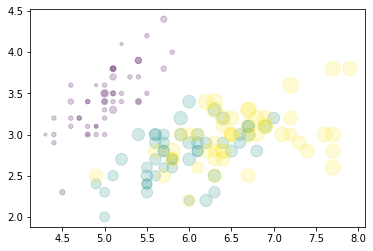

In [93]:
import matplotlib.pyplot as plt
plt.scatter(features_df[0], features_df[1], alpha=0.2, s=100*features_df[3], c=iris.target, cmap='viridis')

In [88]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])